In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from chemprop.CUSTOM.featuriser.featurise import Featuriser, MOL_TYPES
from chemprop import data, featurizers, nn
from chemprop.nn import metrics
from chemprop.models import multi
from chemprop.nn.metrics import MSE
from lightning import pytorch as pl
import pprint



# Set up custom featuriser
1. Parses through SDF files and searches for specific types of mols (R1H and R2H). SDF files will usually contain R1H, R2H and TS - But for this we only need the first two. R1H is the molecule that has the hydrogen that is being `donated`. R2H is the the other molecule that has already `abstracted`.

    So think of the Reaction Equation:

    `R1H + R2 <-> R1 + R2H`

    So we are taking R1H and R2H forms.

2. Also, during this parsing it the SDF's, it will grab the reaction name and check for the relevant targets in the target.csv file `(Although for this purpose we will use target_sin_cos.csv - this focusses on one dihedral target and !!I have filtered out the missing dihedral moleces (marked -10) just for ease!!)`

3. Additionally, there is a function in the featurise.py that gets extra features (features that are not created by DMPNN). These features are our own.

slot 0: d_hydrogen, slot 1: a_hydrogen, slot 2: donator, slot 3: acceptor.

It is one hot encoding, where an atom is marked d_hydrogen == 1 if its the atom that is the donating hydrogen. a_hydrogen is for the abstracted hydrogen. donator is to mark which heavy atom (so not a Hydrogen) that gave away the hydrogen. and acceptor is for the heavy atom that accepted the hydrogen. So `donator` and `d_hydrogen` will have `1` in `R1H` in one of the nodes. And `acceptor` and `a_hydrogen` will have `1`in `R2H` in one of the nodes.

In [3]:
feat_data = Featuriser(
    sdf_path="/home/calvin/code/chemprop_phd_customised/habnet/data/processed/sdf_r2", 
    path = "../DATA/target_data/target_data_sin_cos.csv", # If you want to use full dataset, use target_data.csv, however
    #  you will need to convert the angles for psi1 and psi2 to sin and cos
    #sanitize=True,
    set_col_index=False, target_col=['psi_1_dihedral_sin','psi_1_dihedral_cos'],
    include_extra_features = False,) # <-- We will turn these off for now

Reaction ID rxn_191 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_16785 not found in target data. Skipping this SDF file.
Reaction ID rxn_1169 not found in target data. Skipping this SDF file.
Reaction ID rxn_144 not found in target data. Skipping this SDF file.
Reaction ID rxn_1257 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1155 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1160 not found in target data. Skipping this SDF file.
Reaction ID rxn_798 not found in target data. Skipping this SDF file.
Reaction ID rxn_682 not found in target data. Skipping this SDF file.
Reaction ID rxn_30 not found in target data. Skipping this SDF file.
Reaction ID rxn_795 not found in target data. Skipping this SDF file.
Reaction ID rxn_111 not found in target data. Skipping this SDF file.
Reaction ID rxn_635 not found in target data. Skipping this SDF file.
Reaction ID rxn_824 not found in target data. Skipping this SDF file.


[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords

Reaction ID rxn_182 not found in target data. Skipping this SDF file.
Reaction ID rxn_89 not found in target data. Skipping this SDF file.
Reaction ID rxn_127 not found in target data. Skipping this SDF file.
Reaction ID rxn_286 not found in target data. Skipping this SDF file.
Reaction ID rxn_262 not found in target data. Skipping this SDF file.
Reaction ID rxn_792 not found in target data. Skipping this SDF file.
Reaction ID rxn_909 not found in target data. Skipping this SDF file.
Reaction ID rxn_791 not found in target data. Skipping this SDF file.
Reaction ID rxn_1433 not found in target data. Skipping this SDF file.
Reaction ID rxn_697 not found in target data. Skipping this SDF file.
Reaction ID rxn_342 not found in target data. Skipping this SDF file.
Reaction ID rxn_113 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1129 not found in target data. Skipping this SDF file.
Reaction ID rxn_816 not found in target data. Skipping this SDF file.
Reaction ID rxn

[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:37] Warning: molecule is tagged as 3D, but all Z coords

Reaction ID rmg_rxn_15440 not found in target data. Skipping this SDF file.
Reaction ID rxn_210 not found in target data. Skipping this SDF file.
Reaction ID rxn_733 not found in target data. Skipping this SDF file.
Reaction ID rxn_275 not found in target data. Skipping this SDF file.
Reaction ID rxn_131 not found in target data. Skipping this SDF file.
Reaction ID rxn_223 not found in target data. Skipping this SDF file.
Reaction ID rxn_656 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1147 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1154 not found in target data. Skipping this SDF file.
Reaction ID rxn_818 not found in target data. Skipping this SDF file.
Reaction ID rxn_807 not found in target data. Skipping this SDF file.
Reaction ID rxn_797 not found in target data. Skipping this SDF file.
Reaction ID rxn_345 not found in target data. Skipping this SDF file.
Reaction ID rxn_90 not found in target data. Skipping this SDF file.
React

[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords

Reaction ID rxn_1797 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1161 not found in target data. Skipping this SDF file.
Reaction ID rxn_288 not found in target data. Skipping this SDF file.
Reaction ID rxn_753 not found in target data. Skipping this SDF file.
Reaction ID rxn_790 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1157 not found in target data. Skipping this SDF file.
Reaction ID rxn_672 not found in target data. Skipping this SDF file.
Reaction ID rxn_1301 not found in target data. Skipping this SDF file.
Reaction ID rxn_787 not found in target data. Skipping this SDF file.
Reaction ID rxn_426 not found in target data. Skipping this SDF file.
Reaction ID rxn_185 not found in target data. Skipping this SDF file.
Reaction ID rxn_690 not found in target data. Skipping this SDF file.
Reaction ID rxn_252 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1137 not found in target data. Skipping this SDF file.
Rea

[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords

Reaction ID rxn_70 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1142 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1152 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1163 not found in target data. Skipping this SDF file.
Reaction ID rxn_735 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_15401 not found in target data. Skipping this SDF file.
Reaction ID rxn_623 not found in target data. Skipping this SDF file.
Reaction ID rxn_380 not found in target data. Skipping this SDF file.
Reaction ID rmg_rxn_1146 not found in target data. Skipping this SDF file.
Reaction ID rxn_183 not found in target data. Skipping this SDF file.
Reaction ID rxn_261 not found in target data. Skipping this SDF file.


[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.


Reaction ID rxn_247 not found in target data. Skipping this SDF file.
Reaction ID rxn_825 not found in target data. Skipping this SDF file.
Reaction ID rxn_796 not found in target data. Skipping this SDF file.
Reaction ID rxn_254 not found in target data. Skipping this SDF file.
Reaction ID rxn_801 not found in target data. Skipping this SDF file.
Reaction ID rxn_146 not found in target data. Skipping this SDF file.
Reaction ID rxn_310 not found in target data. Skipping this SDF file.
Reaction ID rxn_264 not found in target data. Skipping this SDF file.
Reaction ID rxn_235 not found in target data. Skipping this SDF file.
Reaction ID rxn_248 not found in target data. Skipping this SDF file.
Reaction ID rxn_1213 not found in target data. Skipping this SDF file.


[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:38] Warning: molecule is tagged as 3D, but all Z coords

Reaction ID rmg_rxn_1153 not found in target data. Skipping this SDF file.
Reaction ID rxn_1477 not found in target data. Skipping this SDF file.
Reaction ID rxn_624 not found in target data. Skipping this SDF file.
Reaction ID rxn_168 not found in target data. Skipping this SDF file.
Reaction ID rxn_126 not found in target data. Skipping this SDF file.
Reaction ID rxn_170 not found in target data. Skipping this SDF file.
Reaction ID rxn_184 not found in target data. Skipping this SDF file.
Reaction ID rxn_806 not found in target data. Skipping this SDF file.
Reaction ID rxn_1125 not found in target data. Skipping this SDF file.
Reaction ID rxn_766 not found in target data. Skipping this SDF file.
Reaction ID rxn_625 not found in target data. Skipping this SDF file.
Reaction ID rxn_1389 not found in target data. Skipping this SDF file.
Reaction ID rxn_192 not found in target data. Skipping this SDF file.
Reaction ID rxn_731 not found in target data. Skipping this SDF file.
Reaction ID 

[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.
[12:16:39] Warning: molecule is tagged as 3D, but all Z coords are zero and 2D stereo markers have been found, marking the mol as 2D.


In [4]:
from rdkit import Chem
for i in range(len(feat_data[0])):
    if feat_data[0][i].name == 'rmg_rxn_1563_r1h':
        print(feat_data[0][i].mol.GetNumAtoms())

5


In [5]:
print(len(feat_data))
# Reason for 2 is that it is a list in lists - list[0] is the first molecule, list[1] is the second molecule
print("Total number of pair molecules: ", len(feat_data[0]))

2
Total number of pair molecules:  1691


In [6]:
print("Molecule R1H: ", feat_data[0][0].name)
print("Molecule R2H: ", feat_data[1][0].name)


Molecule R1H:  rmg_rxn_86_r1h
Molecule R2H:  rmg_rxn_86_r2


In [7]:
from rdkit.Chem.rdchem import HybridizationType
from rdkit.Chem import SanitizeMol
# for j in range(len(feat_data[0])):
#     mol = feat_data[0][j].mol
#     for i in range(mol.GetNumAtoms()):
#         atom = mol.GetAtomWithIdx(i)
#         hyb = atom.GetHybridization()
#         if hyb == HybridizationType.UNSPECIFIED:
#             print(f"Atom {i} has unspecified hybridization.")

for j in range(len(feat_data[1])):
    mol = feat_data[1][j].mol

    for i in range(mol.GetNumAtoms()):
        atom = mol.GetAtomWithIdx(i)
        hyb = atom.GetHybridization()
        if hyb == HybridizationType.UNSPECIFIED:
            print(f"Atom {i} has unspecified hybridization.")
            print(feat_data[1][j].name)




In [8]:
# Check bond types
for bond in feat_data[0][0].mol.GetBonds():
    atom1 = bond.GetBeginAtom()
    atom2 = bond.GetEndAtom()
    print(f"Bond between {atom1.GetSymbol()} and {atom2.GetSymbol()}: Type={bond.GetBondTypeAsDouble()}")

Bond between S and H: Type=1.0
Bond between S and H: Type=1.0


In [9]:
pprint.pprint(feat_data[0][0].y)
# We see that y is kept in the first molecule - not the second -> this is Chemprop's way of doing things

[-0.7247697797808156, 0.6889911220882807]


# Split the components

Their splitter only splits by one molecule rather than taking the two into consideration. That's fine if it's random but since my work is pair molecules, it is not ideal. So when I use their `kennard stone` it is only splitting by the first molecules - the R1H's. I have a code that takes into account both molecule but did not bother to use it here

In [10]:
component_to_split_by = 0
mols = [d.mol for d in feat_data[component_to_split_by]]

train_idx, val_idx, test_idx = data.make_split_indices(
    mols,
    "kennard_stone",
    (0.8, 0.1, 0.1),
    seed=42,
    num_replicates=1
    )

The return type of make_split_indices has changed in v2.1 - see help(make_split_indices)


In [11]:
len(train_idx), len(val_idx), len(test_idx)

# We will see that the len is 1 for each as they use `replicates` - so rather the variabls are tuples that hold different indices
# Since we set as num_replicates = 1, we will only have one set of indices in each of the tuples

(1, 1, 1)

In [12]:
len(train_idx[0])

1352

In [13]:
train_data, val_data, test_data = data.split_data_by_indices(
    feat_data, train_idx, val_idx, test_idx
)

# NEW

In [14]:
rxn_ids = []
for i in range(len(train_data[0][0])):
    rxn_name = train_data[0][0][i].name
    # Need to remove _r1h or _r2h from the reaction name
    rxn_name = rxn_name.replace('_r1h', '').replace('_r2', '')
    rxn_ids.append(rxn_name)

In [15]:
# Read extra info
import pandas as pd
atom_extra_feats = pd.read_csv("/home/calvin/code/chemprop_phd_customised/habnet/data/preprocessing/all_sdf_features.csv")
atom_extra_feats.columns

Index(['rxn_id', 'mol_type', 'focus_atom_idx', 'path', 'radius', 'angle',
       'dihedral', 'r_exist', 'a_exist', 'd_exist', 'focus_atom_symbol',
       'is_donor', 'is_acceptor', 'is_donor_H', 'is_acceptor_neighbor'],
      dtype='object')

In [16]:
import numpy as np

def rbf_expand(values, num_centers=20, r_min=None, r_max=None, gamma=None):
    values = np.asarray(values)
    if r_min is None:
        r_min = float(np.min(values))
    if r_max is None:
        r_max = float(np.max(values))
    # Generate evenly spaced centers
    centers = np.linspace(r_min, r_max, num_centers)
    if gamma is None:
        # Set gamma so adjacent bases overlap well
        gamma = 1.0 / (centers[1] - centers[0])**2
    # Compute RBF
    expanded = np.exp(-gamma * (values[..., None] - centers)**2)
    return expanded  # shape: (len(values), num_centers)

def dihedral_to_sin_cos(dihedrals_deg):
    dihedrals_rad = np.deg2rad(dihedrals_deg)
    sin_vals = np.sin(dihedrals_rad)
    cos_vals = np.cos(dihedrals_rad)
    return np.stack([sin_vals, cos_vals], axis=-1)

def normalize_angle(angle_deg, a_min=0.0, a_max=180.0):
    # If your angles can go up to 180, otherwise adjust a_max as needed
    angle_deg = np.asarray(angle_deg)
    return (angle_deg - a_min) / (a_max - a_min)



In [17]:
import numpy as np
import pandas as pd

# Your DataFrame and rxn_ids
# atom_extra_feats: DataFrame with all data
# rxn_ids: list of rxn_ids in the train set

# 1. Subset for fitting
train_mask = atom_extra_feats['rxn_id'].isin(rxn_ids)
train_feats = atom_extra_feats[train_mask]

# 2. Compute parameters from training data
num_centers = 16
r_min = train_feats['radius'].min()
r_max = train_feats['radius'].max()
a_min = train_feats['angle'].min()
a_max = train_feats['angle'].max()

# 3. Apply to all data using train params
radius_rbf = rbf_expand(atom_extra_feats['radius'].values, num_centers=num_centers, r_min=r_min, r_max=r_max)
dihedral_sc = dihedral_to_sin_cos(atom_extra_feats['dihedral'].values)
angle_norm = normalize_angle(atom_extra_feats['angle'].values, a_min=a_min, a_max=a_max)

# 4. Stack or add to DataFrame
for i in range(num_centers):
    atom_extra_feats[f'radius_rbf_{i}'] = radius_rbf[:, i]
atom_extra_feats['dihedral_sin'] = dihedral_sc[:, 0]
atom_extra_feats['dihedral_cos'] = dihedral_sc[:, 1]
atom_extra_feats['angle_norm'] = angle_norm


In [18]:
def get_atom_feats_for_dp(dp_name, atom_extra_feats):
    rxn_id, mol_type = dp_name.rsplit('_', 1)
    subset = atom_extra_feats[
        (atom_extra_feats['rxn_id'] == rxn_id) &
        (atom_extra_feats['mol_type'] == mol_type)
    ]
    # Sort by focus_atom_idx
    subset = subset.sort_values("focus_atom_idx")
    return subset


def attach_morgan_to_dps(dps):
    new_dps = []
    drop_cols = ['rxn_id', 'mol_type', 'focus_atom_idx', 'path', 'radius', 'angle', 'dihedral','focus_atom_symbol']
    for dp in dps:
        # pick the mol you actually want to fingerprint:
        mol = dp.mol if not isinstance(dp.mol, tuple) else dp.mol[0]
        extra_atom_feats = get_atom_feats_for_dp(dp.name, atom_extra_feats).drop(columns=drop_cols).values
        new_dp = data.MoleculeDatapoint(
            mol=dp.mol,
            y=dp.y,
            weight=dp.weight,
            gt_mask=dp.gt_mask,
            lt_mask=dp.lt_mask,
            V_f=extra_atom_feats,
            E_f=dp.E_f,
            V_d=dp.V_d,
            x_d=dp.x_d,      # <-- lowercase x_d
            x_phase=dp.x_phase,
            name=dp.name
        )
        new_dps.append(new_dp)
    return new_dps


featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer(extra_atom_fdim=26)

train_datasets = [
    data.MoleculeDataset(
        attach_morgan_to_dps(train_data[0][i]),
        featurizer
    )
    for i in range(len(MOL_TYPES))
]

val_datasets = [
    data.MoleculeDataset(
        attach_morgan_to_dps(val_data[0][i]),
        featurizer
    )
    for i in range(len(MOL_TYPES))
]
test_datasets = [
    data.MoleculeDataset(
        attach_morgan_to_dps(test_data[0][i]),
        featurizer
    )
    for i in range(len(MOL_TYPES))
]


In [19]:
train_datasets[1].data[0].V_f.shape

(7, 26)

In [20]:
train_datasets[1].data[0].name

'kfir_rxn_13897_r2'

In [21]:
train_mcdset = data.MulticomponentDataset(train_datasets)
# scaler = train_mcdset.normalize_targets()

val_mcdset = data.MulticomponentDataset(val_datasets)
# val_mcdset.normalize_targets(scaler)
test_mcdset = data.MulticomponentDataset(test_datasets)


# DMPNN Featurise & Datasets

In the `featurizers.SimpleMoleculeMolGraphFeaturizer` we can change the `atom` and `bond` featurizers from the default but we will not. Additionally, if we added the extra features as mentioned before, we need to tell it that by adjusting `extra_atom_fdim` and or `extra_bond_fdim`

Note! We will have 27 feats for Bonds even though Chemprop originally does 14. The reason for the extra 13 is that I added in the `SimpleMoleculeMolGraphFeaturizer` more information for the bonds - creating radial basis function of the bond lengths and also the angles of the bonds. However we do not need to place 13 in the `extra_bond_fdim` because I made it a core part of the featurizer.

In [22]:
# featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer(
#     extra_atom_fdim=0, extra_bond_fdim=0
# )



# train_datasets = [data.MoleculeDataset(train_data[0][i], featurizer) for i in range(len(MOL_TYPES))]
# val_datasets = [data.MoleculeDataset(val_data[0][i], featurizer) for i in range(len(MOL_TYPES))]
# test_datasets = [data.MoleculeDataset(test_data[0][i], featurizer) for i in range(len(MOL_TYPES))]

In [23]:
# len(train_datasets[0]), len(val_datasets[0]), len(test_datasets[0])

In [24]:
print("Number of node feats.: ", train_datasets[0][0].mg.V.shape[1])
print("Number of edge feats.: ", train_datasets[0][0].mg.E.shape[1])

Number of node feats.:  98
Number of edge feats.:  14


In [25]:
train_mcdset = data.MulticomponentDataset(train_datasets)
val_mcdset = data.MulticomponentDataset(val_datasets)
test_mcdset = data.MulticomponentDataset(test_datasets)

In [26]:
train_loader = data.build_dataloader(train_mcdset, batch_size=64, shuffle=True, num_workers=8, pin_memory=True)
val_loader = data.build_dataloader(val_mcdset, shuffle=False, batch_size=64)
test_loader = data.build_dataloader(test_mcdset, shuffle=False, batch_size=64)

In [27]:
for batch in train_loader:
    print(batch[0][0].E)
    print(batch[0][0].V)
    break

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0174,  0.9998,  0.3432],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.4896],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 1.0000,  0.0000,  0.0000,  ..., -0.0174,  0.9998,  0.3404],
        [ 1.0000,  0.0000,  0.0000,  ...,  0.0174,  0.9998,  0.3404],
        [ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


# Creating the Model in parts

## MPNN

First we have the Bond Message Passer we need to set up. Here we can tell it to either create a shared encoder or separate encoder - One for R1H molecules and One for R2H molecules. They then will be aggregated together. 

![img](multi_dmpnn.png)

In [28]:
mcmp = nn.MulticomponentMessagePassing(
    blocks=[nn.BondMessagePassing(depth=4, dropout=0.2, d_v=featurizer.atom_fdim, d_e=featurizer.bond_fdim, d_h=1024,
                                  ) for _ in range(len(MOL_TYPES))],
    n_components=len(MOL_TYPES), shared = False    
)


## Aggregation
https://chemprop.readthedocs.io/en/latest/tutorial/python/models/aggregation.html

In [29]:
agg = nn.MeanAggregation()

## Optional - Loss Function
Since Chemprop does not have a loss function that handles periodic, needed to implement myself. Creating custom one explained here:
https://chemprop.readthedocs.io/en/latest/tutorial/python/loss_functions.html

In [30]:
import torch
import torch.nn.functional as F
from chemprop.nn.metrics import ChempropMetric
from torch import Tensor

class CircVectorCosine(ChempropMetric):
    r"""
    Cosine‐based loss for 2-D circular vectors.
    For each (sin,cos) pair it computes
        loss = 1 - cosine_similarity(pred_vector, true_vector)
    and then applies your usual masking & weighting.
    """
    def __init__(self, task_weights=None):
        super().__init__(task_weights=task_weights)

    def _calc_unreduced_loss(self,
                             preds: torch.Tensor,    # (B, out_dim)
                             targets: torch.Tensor,  # (B, out_dim)
                             mask: torch.Tensor,     # (B, out_dim)
                             weights: torch.Tensor,  # (B,) or (B,2T) or (B,T)
                             lt_mask: torch.Tensor,
                             gt_mask: torch.Tensor
                            ) -> torch.Tensor:
        B, orig_dim = preds.shape

        # how many full (sin,cos) pairs?
        T = orig_dim // 2
        slice_width = 2 * T

        # slice everything down to exactly 2*T columns
        preds   = preds[:,   :slice_width]
        targets = targets[:, :slice_width]
        mask    = mask[:,    :slice_width]

        # now reshape safely (B, T, 2)
        preds   = preds.view(B, T, 2)
        targets = targets.view(B, T, 2)

        # vector‐level mask: require both sin & cos valid
        comp_mask = mask.view(B, T, 2).all(dim=-1)  # (B, T)

        # ==== robust weight handling ====
        w = weights
        if w.ndim == 1 and w.numel() == B:
            w = w.unsqueeze(1).expand(B, T)
        elif w.ndim == 2 and w.numel() == B * T:
            w = w.view(B, T)
        elif w.ndim == 2 and w.numel() == B * slice_width:
            w = w.view(B, T, 2).mean(dim=-1)
        else:
            w = torch.tensor(w.mean(), device=w.device).expand(B, T)
        # =================================

        # compute cosine similarity in [-1,1]
        cos_sim = F.cosine_similarity(preds, targets, dim=-1)  # (B, T)

        # loss = 1 - cosine_similarity
        loss = (1.0 - cos_sim) * comp_mask * w  # (B, T)

        return loss


class CosineAngleMetric(ChempropMetric):
    """A metric reporting mean(1-cosine_similarity) across all (sample,task)."""
    def __init__(self, task_weights=None):
        super().__init__(task_weights=task_weights)

    @property
    def alias(self) -> str:
        return "mean_cosine_loss"

    def _calc_unreduced_loss(self,
        preds: torch.Tensor,
        targets: torch.Tensor,
        mask: torch.Tensor,
        weights: torch.Tensor,
        lt_mask: torch.Tensor,
        gt_mask: torch.Tensor
    ) -> torch.Tensor:
        # reuse exactly the same computation as CircVectorCosine
        return CircVectorCosine._calc_unreduced_loss(
            self, preds, targets, mask, weights, lt_mask, gt_mask
        )

class AngularErrorMetric(ChempropMetric):
    """Mean absolute angular error in degrees, reported over B·2T entries."""
    def __init__(self, task_weights=None, in_degrees: bool = True):
        super().__init__(task_weights=task_weights)
        self.in_degrees = in_degrees

    @property
    def alias(self) -> str:
        return "val_maae_deg"

    def _calc_unreduced_loss(
        self,
        preds: Tensor,    # (B, 2T)
        targets: Tensor,  # (B, 2T)
        mask: Tensor,     # (B, 2T)
        weights: Tensor,  # (B,) or (B,T) or (B,2T)
        lt_mask: Tensor,
        gt_mask: Tensor
    ) -> Tensor:
        B, out_dim = preds.shape
        T = out_dim // 2
        slice_w = 2 * T

        # trim & reshape
        p = preds[:, :slice_w].view(B, T, 2)
        t = targets[:, :slice_w].view(B, T, 2)
        m = mask[:, :slice_w].view(B, T, 2)

        # vector‐level validity mask
        vec_mask = m.all(dim=-1)  # (B, T)

        # angles, difference, wrap, abs
        pred_ang = torch.atan2(p[...,0], p[...,1])
        true_ang = torch.atan2(t[...,0], t[...,1])
        diff = (pred_ang - true_ang + torch.pi) % (2*torch.pi) - torch.pi
        err  = diff.abs()                 # (B, T)
        if self.in_degrees:
            err = err * 180.0 / torch.pi

        # zero out invalid
        err = err * vec_mask             # (B, T)

        # now tile each error into both sin‐ and cos‐slots → (B,T,2)
        err2 = err.unsqueeze(-1).expand(B, T, 2)
        # flatten → (B, 2T)
        return err2.reshape(B, slice_w)



## FFN Head

Again, Chemprop does not provide a periodic head so needed to create one

In [31]:
import torch
from torch import Tensor
from chemprop.nn.predictors import RegressionFFN

class PeriodicRegressionFFN(RegressionFFN):
    """
    A RegressionFFN that predicts (sin θ, cos θ) for each task and
    renormalizes to unit length.
    """
    def __init__(
        self,
        input_dim: int = 300,
        hidden_dim: int = 300,
        n_layers: int = 1,
        dropout: float = 0.0,
        activation: str = "relu",
        n_tasks: int = 1,
        criterion=None,
    ):

        super().__init__(
            input_dim=input_dim,
            hidden_dim=hidden_dim,
            n_layers=n_layers,
            dropout=dropout,
            activation=activation,
            n_tasks=n_tasks,
            criterion=criterion
        )

    def forward(self, x: Tensor) -> Tensor:
        """
        x: (batch, input_dim)
        returns: (batch, 2 * n_tasks) raw outputs,
                 which we then reshape + normalize.
        """
        raw = self.ffn(x)  # shape (batch, 2 * n_tasks)
        
        B, twoT = raw.shape
        T = twoT // 2
        
        # reshape to (batch, T, 2)
        vecs = raw.view(B, T, 2)
        
        # normalize each 2-vector to unit length
        norms = torch.norm(vecs, dim=-1, keepdim=True).clamp(min=1e-6)
        unit = vecs / norms
        
        # flatten back to (batch, 2*T)
        return unit.view(B, 2 * T)


In [32]:
num_tasks = 2
loss_fn = CircVectorCosine(task_weights=[1.0])
ffn = PeriodicRegressionFFN(
    input_dim=mcmp.output_dim,
    n_tasks=2,
    dropout=0.1,
    n_layers=2
)

## Metrics

No proper metric class for what we are measuring so need to create one

In [33]:
metric_list = [CosineAngleMetric(task_weights=[1.0, 1.0]), AngularErrorMetric(task_weights=[1.0, 1.0])] # Only the first metric is used for training and early stopping - can provide many though

## Bring it all together

Note Chemprop has set their optimizer and scheduler as NoamLike. So to change it you would need to change code or replace it via mcmpnn.configure_optimizer= I believe

In [34]:
mcmpnn = multi.MulticomponentMPNN(
    mcmp,
    agg,
    ffn,
    metrics=metric_list,
    warmup_epochs=8,
    max_lr = 5e-4,
    init_lr=5e-5,
    final_lr=1e-5,
    batch_norm=True

)
mcmpnn

MulticomponentMPNN(
  (message_passing): MulticomponentMessagePassing(
    (blocks): ModuleList(
      (0-1): 2 x BondMessagePassing(
        (W_i): Linear(in_features=112, out_features=1024, bias=False)
        (W_h): Linear(in_features=1024, out_features=1024, bias=False)
        (W_o): Linear(in_features=1122, out_features=1024, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (tau): ReLU()
        (V_d_transform): Identity()
        (graph_transform): Identity()
      )
    )
  )
  (agg): MeanAggregation()
  (bn): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (predictor): PeriodicRegressionFFN(
    (ffn): MLP(
      (0): Sequential(
        (0): Linear(in_features=2048, out_features=300, bias=True)
      )
      (1): Sequential(
        (0): ReLU()
        (1): Dropout(p=0.1, inplace=False)
        (2): Linear(in_features=300, out_features=300, bias=True)
      )
      (2): Sequential(
        (0): ReLU()
        (1): Dropout

# Custom Callback

In [35]:
class LossHistoryCallback(pl.Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        self.train_losses.append(trainer.callback_metrics['train_loss'].cpu().item())

    def on_validation_epoch_end(self, trainer, pl_module):
        self.val_losses.append(trainer.callback_metrics['val_loss'].cpu().item())

# 1) Instantiate callback and pass to Trainer
loss_history = LossHistoryCallback()

In [36]:
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import LearningRateMonitor

# CSVLogger writes metrics.csv under logs/lr_run/
csv_logger = CSVLogger(save_dir="logs/", name="lr_run")
lr_monitor = LearningRateMonitor(logging_interval='epoch')

trainer = pl.Trainer(
    logger=csv_logger,            # <-- use CSVLogger
    enable_checkpointing=True,
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=100,
    # profiler='simple',

    callbacks=[loss_history, lr_monitor],
)
trainer.fit(mcmpnn, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Loading `train_dataloader` to estimate number of stepping batches.
/home/calvin/miniforge3/envs/habnet_env/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.

  | Name            | Type                         | Params | Mode 
-------------------------------------------------------------------------
0 | message_passing | MulticomponentMessagePassing | 4.6 M  | train
1 | agg             | MeanAggregation              | 0      | train
2 | bn              | BatchNorm1d                  | 4.1 K  | train
3 | predictor       | PeriodicRegressionFFN        | 705 K  | train
4 | X_d_transform   | Identity                     | 0      | train
5 | metrics         | ModuleList     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/calvin/miniforge3/envs/habnet_env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [37]:
trainer.test(mcmpnn, test_loader)

/home/calvin/miniforge3/envs/habnet_env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   test/mean_cosine_loss   │     0.599133312702179     │
│     test/val_maae_deg     │     58.87290954589844     │
└───────────────────────────┴───────────────────────────┘

[{'test/mean_cosine_loss': 0.599133312702179,
  'test/val_maae_deg': 58.87290954589844}]

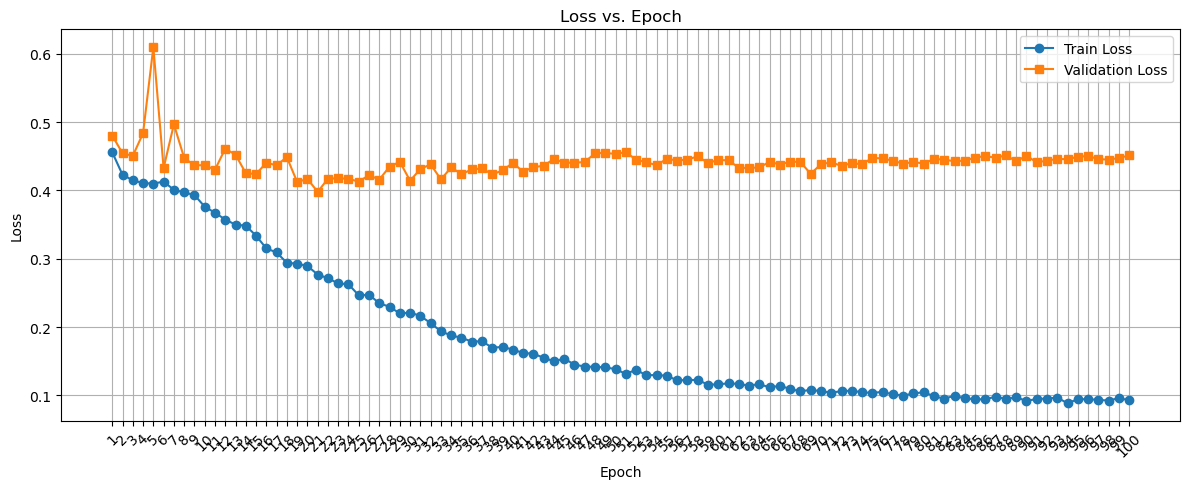

In [38]:
import matplotlib.pyplot as plt

train_losses = loss_history.train_losses
# Need to drop the first value as it a sanity check
val_losses = loss_history.val_losses[1:]

assert len(train_losses) == len(val_losses), (
    f"Lengths now match: train={len(train_losses)}, val={len(val_losses)}"
)

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses,   label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.xticks(epochs)
# Rotate x-ticks for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
